## Global Ocean Data Analysis Project


This notebook is a viewer: Five types of data organized as depth-sorted layers of the global ocean. Data are downloaded from the web by this notebook to keep the repository size
manageable. See the **Programming Resources** notebook on reducing glodap data file size.


The [GLODAP](https://en.wikipedia.org/wiki/Global_Ocean_Data_Analysis_Project) 
global ocean dataset compiles several decades of observation. It is a 'geological instant' snapshot of
the state of the entire ocean, albeit downsampled a bit.


Moving the sliders for each chart selects for depth, as shown at the bottom left.


- To do: GLODAP data used here is the 2016 version; 2021 v2 available




The cell below imports data from the internet. This data load-in helps keep the repository itself reasonably small.
It typically takes up to two minutes to complete.

In [8]:
I_need_to_get_the_data_files = True

if I_need_to_get_the_data_files:
    !mkdir glodap
    !wget -q https://kilroybackup.s3.us-west-2.amazonaws.com/glodap/NO3.nc -O glodap/NO3.nc
    !wget -q https://kilroybackup.s3.us-west-2.amazonaws.com/glodap/TCO2.nc -O glodap/TCO2.nc
    !wget -q https://kilroybackup.s3.us-west-2.amazonaws.com/glodap/oxygen.nc -O glodap/oxygen.nc
    !wget -q https://kilroybackup.s3.us-west-2.amazonaws.com/glodap/salinity.nc -O glodap/salinity.nc
    !wget -q https://kilroybackup.s3.us-west-2.amazonaws.com/glodap/temperature.nc -O glodap/temperature.nc
    
the_data_files_are_in_the_glodap_subfolder = True

if the_data_files_are_in_the_glodap_subfolder: ddir = './glodap/'
else:                                          ddir = '../../data/glodap/'    # this is a location outside of the repository
                                                                              # keeping the data here reduces the bulk of the repo  

mkdir: cannot create directory ‘glodap’: File exists


In [9]:
import os, sys, time, glob, warnings, cmocean
from IPython.display import clear_output
warnings.filterwarnings('ignore')
this_dir = os.getcwd()  

from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors
from matplotlib import animation, rc
import numpy as np, pandas as pd, xarray as xr
from numpy import datetime64 as dt64, timedelta64 as td64

from ipywidgets import *
from traitlets import dlink

In [10]:
temperatureFnm = ddir + 'temperature.nc'
salinityFnm    = ddir + 'salinity.nc'
oxygenFnm      = ddir + 'oxygen.nc'
NO3Fnm         = ddir + 'NO3.nc'
TCO2Fnm        = ddir + 'TCO2.nc'

S = xr.open_dataset(salinityFnm)
T = xr.open_dataset(temperatureFnm)
O = xr.open_dataset(oxygenFnm)
N = xr.open_dataset(NO3Fnm)
R = xr.open_dataset(TCO2Fnm)

interactive(children=(IntSlider(value=0, continuous_update=False, description='O depth', max=32), Output()), _…

<function __main__.oxygen(depth_index)>

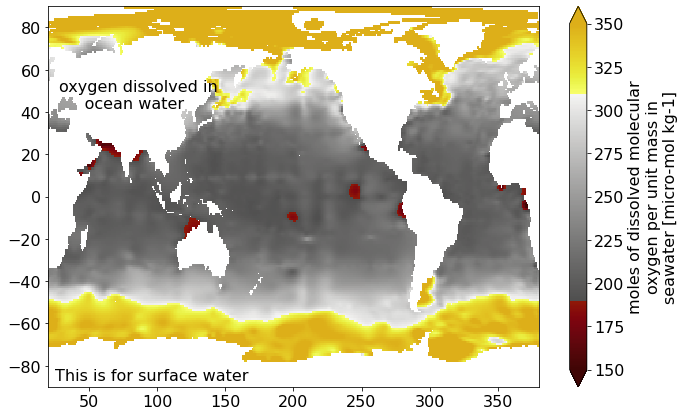

In [12]:
def oxygen(depth_index):
    O['oxygen'].sel(depth_surface = depth_index).plot(figsize=(11, 7),cmap=cmocean.cm.oxy,vmin=150, vmax=350)
    plt.ylabel(None); plt.xlabel(None)
    if depth_index == 0: msg = 'This is for surface water'
    else:                msg = 'This is for water at ' + str(int(O['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg); plt.text(28, 50, 'oxygen dissolved in'); plt.text(28, 42, '     ocean water   ')

interact(oxygen, depth_index=widgets.IntSlider(min=0, max=32, step=1, value=0, continuous_update=False, description='O depth'))

interactive(children=(IntSlider(value=0, continuous_update=False, description='O depth', max=32), Output()), _…

interactive(children=(IntSlider(value=0, continuous_update=False, description='S depth', max=32), Output()), _…

interactive(children=(IntSlider(value=0, continuous_update=False, description='T depth', max=32), Output()), _…

interactive(children=(IntSlider(value=0, continuous_update=False, description='NO3 depth', max=32), Output()),…

interactive(children=(IntSlider(value=0, continuous_update=False, description='CO2 depth', max=32), Output()),…

<function __main__.carbonate(depth_index)>

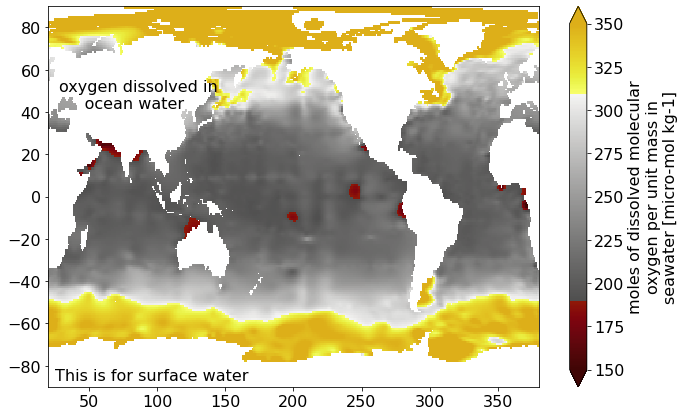

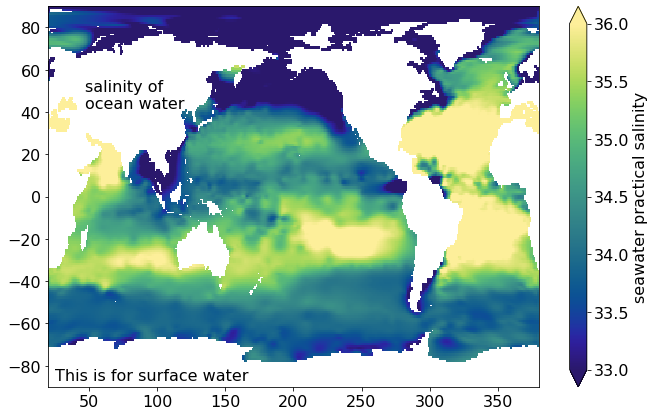

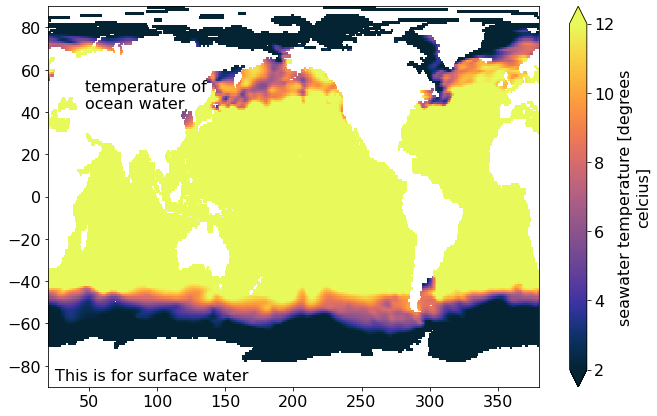

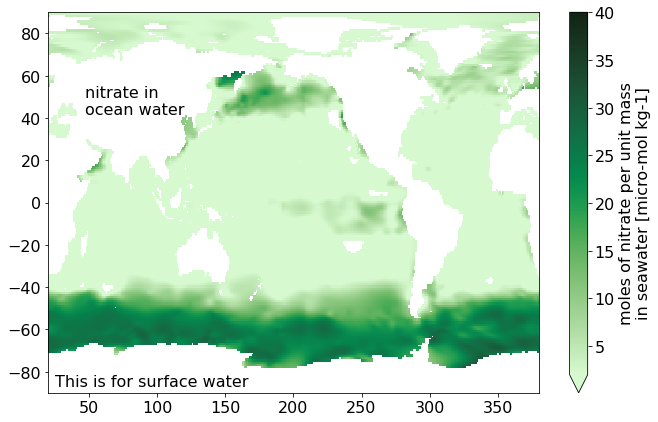

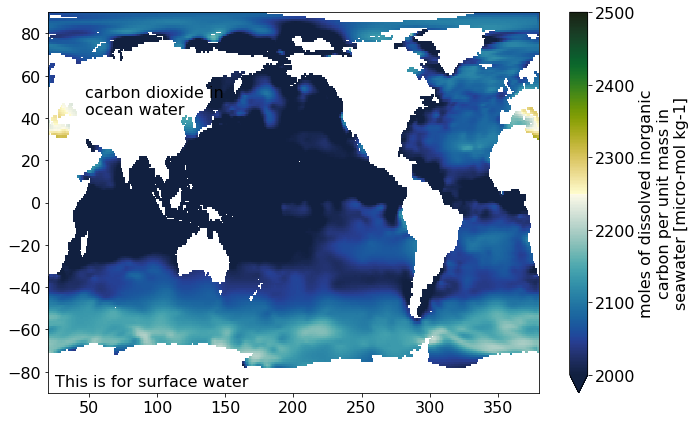

In [11]:
plt.rcParams.update({'font.size': 16})

def oxygen(depth_index):
    O['oxygen'].sel(depth_surface = depth_index).plot(figsize=(11, 7),cmap=cmocean.cm.oxy,vmin=150, vmax=350)
    plt.ylabel(None); plt.xlabel(None)
    if depth_index == 0: msg = 'This is for surface water'
    else:                msg = 'This is for water at ' + str(int(O['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg); plt.text(28, 50, 'oxygen dissolved in'); plt.text(28, 42, '     ocean water   ')

def salinity(depth_index):
    S['salinity'].sel(depth_surface = depth_index).plot(figsize=(11, 7),cmap=cmocean.cm.haline,vmin=33, vmax=36)
    plt.ylabel(None); plt.xlabel(None)
    if depth_index == 0: msg = 'This is for surface water'
    else:                msg = 'This is for water at ' + str(int(S['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg); plt.text(47, 50, 'salinity of'); plt.text(47, 42, 'ocean water')

def temperature(depth_index):
    T['temperature'].sel(depth_surface = depth_index).plot(figsize=(11, 7),cmap=cmocean.cm.thermal,vmin=2., vmax=12.)
    plt.ylabel(None); plt.xlabel(None)
    if depth_index == 0: msg = 'This is for surface water'
    else:                msg = 'This is for water at ' + str(int(T['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg); plt.text(47, 50, 'temperature of'); plt.text(47, 42, 'ocean water')
    
def nitrate(depth_index):
    N['NO3'].sel(depth_surface = depth_index).plot(figsize=(11, 7),cmap=cmocean.cm.algae,vmin=2., vmax=40.)
    plt.ylabel(None); plt.xlabel(None)
    if depth_index == 0: msg = 'This is for surface water'
    else:                msg = 'This is for water at ' + str(int(N['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg); plt.text(47, 50, 'nitrate in'); plt.text(47, 42, 'ocean water')

def carbonate(depth_index):
    R['TCO2'].sel(depth_surface = depth_index).plot(figsize=(11, 7), cmap=cmocean.cm.delta, vmin=2000., vmax=2500.)
    plt.ylabel(None); plt.xlabel(None)
    if depth_index == 0: msg = 'This is for surface water'
    else:                msg = 'This is for water at ' + str(int(R['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg); plt.text(47, 50, 'carbon dioxide in'); plt.text(47, 42, 'ocean water')

interact(oxygen,      depth_index=widgets.IntSlider(min=0, max=32, step=1, value=0, continuous_update=False, description='O depth'))
interact(salinity,    depth_index=widgets.IntSlider(min=0, max=32, step=1, value=0, continuous_update=False, description='S depth'))
interact(temperature, depth_index=widgets.IntSlider(min=0, max=32, step=1, value=0, continuous_update=False, description='T depth'))
interact(nitrate,     depth_index=widgets.IntSlider(min=0, max=32, step=1, value=0, continuous_update=False, description='NO3 depth'))
interact(carbonate,   depth_index=widgets.IntSlider(min=0, max=32, step=1, value=0, continuous_update=False, description='CO2 depth'))

## Set the slider above to 28

Compare with the mid-ocean ridges shown here.


<BR>
<img src="./../Images/charts/lithosphere_age.png" style="float: left;" alt="drawing" width="800"/>
<div style="clear: left"><BR>